In [1]:
!pip uninstall notenbildung -y > /dev/null 2>&1
!pip install git+https://github.com/tna76874/notentransparenz.git@9cd5acff9457d8cb3f45df31a3e41dc7a2d0bbed > /dev/null 2>&1

from notenbildung.models import *

In [2]:
eine_note = NoteEntity(15,system = SystemNP)
print(eine_note)
eine_note.to(SystemNPS)
print(eine_note)
eine_note.to(SystemN)
print(eine_note)
eine_note.to(SystemNORM)
eine_note.to(SystemNP)
print(eine_note)

15.0
0.666666666666667
1.0
15.0


In [3]:
ka = Weight(NoteEntity(3,system = SystemN), NoteEntity(4,system = SystemN), NoteEntity(3.5,system = SystemN)).normalize()
kt = Weight(NoteEntity(3,system = SystemN), NoteEntity(1,system = SystemN), NoteEntity(2.5,system = SystemN)).set_weight(1)
mündlich = Weight(NoteEntity(2,system = SystemN), NoteEntity(1,system = SystemN), NoteEntity(3,system = SystemN)).set_weight(1)
print(f'KA: {ka}, KT: {kt}, mündlich: {mündlich}')
schriftlich = ka + kt
gesamt = schriftlich.set_weight(3) + mündlich
print(f'schriftlich: {schriftlich}, gesamt: {gesamt}')

KA: 3*3.5, KT: 1*2.1666666666666665, mündlich: 1*2.0
schriftlich: 3*3.1666666666666665, gesamt: 4*2.875


m_s1=3.4821428571428568, m_s=3.4290540540540535, m_m=3.25, gesamtnote=3.3842905405405403, datum=15.04.2024


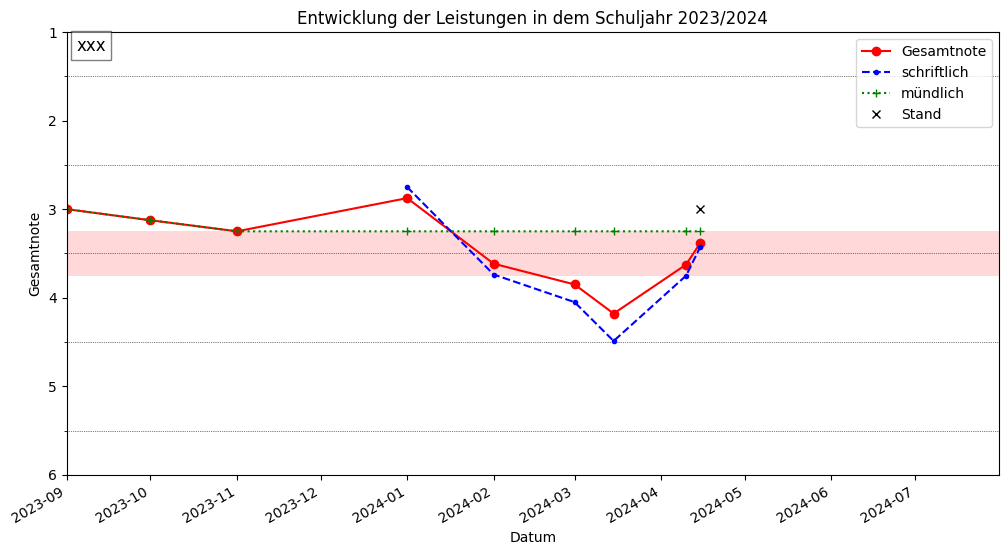

In [4]:
noten = Notenberechnung(w_s0=1, w_sm=3, system = SystemN)
noten.note_hinzufuegen(art='KA', date = '2024-04-10', note=2, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-04-15', note=2.5, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-03-01', note=4.5, status='fertig')
noten.note_hinzufuegen(art='KA', date = '2024-03-15', note=5, status='fertig')
noten.note_hinzufuegen(art='KT', date = '2024-02-01', note=4, status='fehlt')
noten.note_hinzufuegen(art='KT', date = '2024-01-01', note=2.75, status='fehlt')
noten.note_hinzufuegen(art='m', date = '2023-09-01', note=3.0)
noten.note_hinzufuegen(art='m', date = '2023-10-01', note=3.25)
noten.note_hinzufuegen(art='m', date = '2023-11-01', note=3.5)

gesamtnote = noten.berechne_gesamtnote()
print(gesamtnote)
noten.plot_time_series()

In [5]:
noten._get_full_dataframe()

,date,art,status,note,nr,von,bis
0,2023-09-01,m,---,3.0,1.0,2023-09-01,2023-09-01
1,2023-10-01,m,---,3.25,2.0,2023-10-01,2023-10-01
2,2023-11-01,m,---,3.5,3.0,2023-11-01,2023-11-01
3,2024-01-01,KT,fehlt,2.75,1.0,NaT,NaT
4,NaT,V,---,3.75,NaN,NaT,NaT
5,2024-02-01,KT,fehlt,4.0,2.0,NaT,NaT
6,NaT,V,---,3.75,NaN,NaT,NaT
7,2024-03-01,KA,fertig,4.5,1.0,NaT,NaT
8,NaT,V,---,3.25,NaN,NaT,NaT
9,2024-03-15,KA,fertig,5.0,2.0,NaT,NaT
